In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000035527"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000035527
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,FIFTH THIRD BANCORP
Ticker,FITB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,66.0,1.696470e+01,3.022672e+00,1.231000e+01,1.497750e+01,1.684500e+01,1.841500e+01,2.477000e+01
interest income,72.0,1.162959e+09,1.818261e+08,9.700000e+08,1.017500e+09,1.095000e+09,1.272500e+09,1.550000e+09
net income,72.0,3.415245e+08,3.656986e+08,-2.142000e+09,3.127500e+08,3.815000e+08,4.380048e+08,1.014000e+09
net interest income,72.0,8.629329e+08,1.003775e+08,7.100000e+08,7.532500e+08,8.875000e+08,9.030000e+08,1.082000e+09
provision for loan losses,72.0,2.110247e+08,3.506492e+08,2.300000e+07,6.850000e+07,8.700000e+07,1.242500e+08,2.356000e+09
total revenue,49.0,1.599347e+09,3.261372e+08,9.630000e+08,1.466000e+09,1.539000e+09,1.641000e+09,3.419000e+09


# Plots

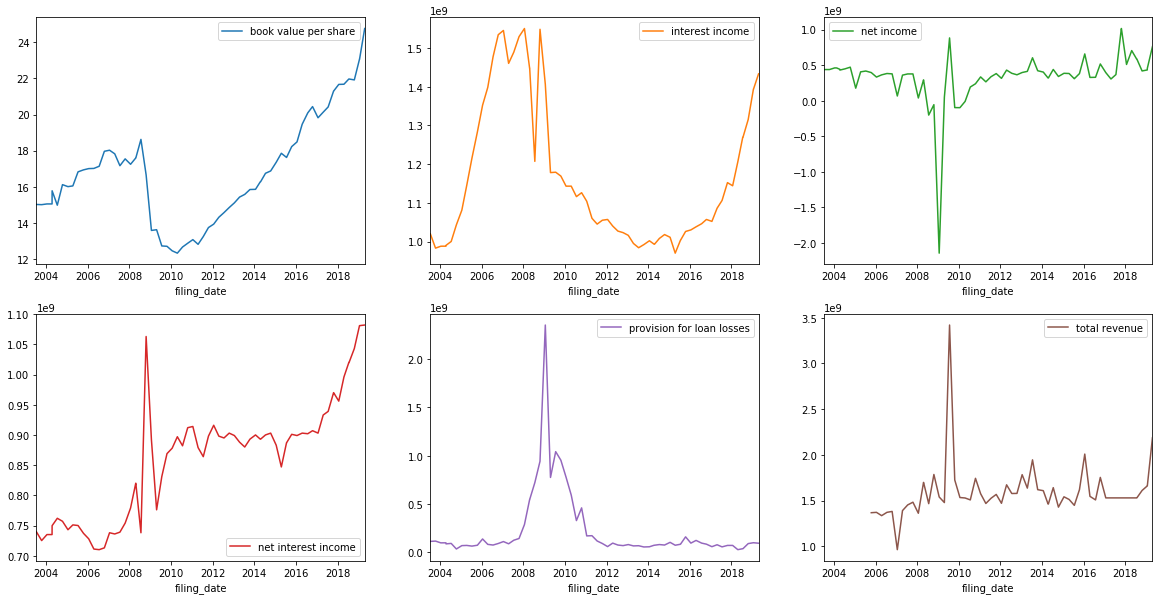

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type         message
cik        item                                                               
0000035527 total revenue  2003Q2 to 2005Q2: 9 periods  missing  Missing period
           total revenue  2017Q1 to 2018Q2: 6 periods  missing  Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()